**Rainfall Prediction Project**
1. Introduction
This project aims to predict precipitation levels based on various weather parameters using the Austin Weather dataset. We will explore trends and dependencies between precipitation and other weather attributes such as temperature, humidity, and wind speed. The primary machine learning model used will be Linear Regression.

2. Data Loading and Initial Exploration
First, we load the austin_weather.csv dataset and perform initial exploration to understand its structure, identify data types, and check for missing values.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving austin_weather.csv to austin_weather.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
try:
    df = pd.read_csv('austin_weather.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'austin_weather.csv' not found. Please ensure the file is in the same directory as the notebook.")
    # Exit or handle the error appropriately
    exit()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Dataset loaded successfully.

First 5 rows of the dataset:
         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  S

3. Data Cleaning and Preprocessing
The dataset needs cleaning. We will address irrelevant columns, handle missing values, and convert non-numeric entries (like 'T' for trace precipitation and '-' for missing values) in numerical columns. The PrecipitationSumInches column is the target variable.

In [3]:
# Drop irrelevant columns
# The 'Date' column is useful for time series visualization but not directly for Linear Regression features
# 'Events' column is categorical and would require one-hot encoding if used, but for simplicity, we'll exclude it
# for this basic linear regression model, focusing on numerical weather parameters.
# 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityLowMiles',
# 'WindGustMPH' have a significant number of missing values or values that might not be directly useful without
# more complex handling, so we'll simplify by focusing on average values.
columns_to_drop = ['Date', 'Events', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches',
                   'VisibilityHighMiles', 'VisibilityLowMiles', 'WindGustMPH']
df_cleaned = df.drop(columns=columns_to_drop)

# Handle 'T' (trace) and '-' values in 'PrecipitationSumInches' and other numerical columns
# Replace 'T' with a small numerical value (e.g., 0.001 inches) and '-' with NaN
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object': # Check if the column is of object type (string)
        df_cleaned[col] = df_cleaned[col].replace('T', '0.001')
        df_cleaned[col] = df_cleaned[col].replace('-', np.nan)
        # Convert to numeric, coercing errors will turn problematic values into NaN
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Fill remaining NaN values with the mean of their respective columns
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

# Verify that there are no more missing values and data types are numeric
print("\nDataset Info after cleaning and preprocessing:")
df_cleaned.info()

print("\nFirst 5 rows of the cleaned dataset:")
print(df_cleaned.head())


Dataset Info after cleaning and preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1319 non-null   int64  
 1   TempAvgF                   1319 non-null   int64  
 2   TempLowF                   1319 non-null   int64  
 3   DewPointHighF              1319 non-null   float64
 4   DewPointAvgF               1319 non-null   float64
 5   DewPointLowF               1319 non-null   float64
 6   HumidityHighPercent        1319 non-null   float64
 7   HumidityAvgPercent         1319 non-null   float64
 8   HumidityLowPercent         1319 non-null   float64
 9   SeaLevelPressureAvgInches  1319 non-null   float64
 10  VisibilityAvgMiles         1319 non-null   float64
 11  WindHighMPH                1319 non-null   float64
 12  WindAvgMPH                 1319 non-null   float64
 13  

4. Feature Selection and Data Splitting
For Linear Regression, we will use numerical weather parameters as features to predict PrecipitationSumInches. We'll split the data into training and testing sets.

In [4]:
# Define features (X) and target (y)
X = df_cleaned.drop('PrecipitationSumInches', axis=1)
y = df_cleaned['PrecipitationSumInches']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (1055, 13)
Shape of X_test: (264, 13)
Shape of y_train: (1055,)
Shape of y_test: (264,)


5. Model Training (Linear Regression)
We will train a Linear Regression model using the preprocessed training data.

In [5]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression Model trained successfully.")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Linear Regression Model trained successfully.
Model Coefficients: [ 0.05052883 -0.09197369  0.04979434  0.01252459 -0.03351445  0.0139555
  0.01048469 -0.02210262  0.01878581 -0.08592824 -0.09539288  0.05335613
 -0.05120241]
Model Intercept: 2.6736124222127975


6. Model Evaluation
After training, we evaluate the model's performance on the test set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score.

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Model Evaluation:
Mean Absolute Error (MAE): 0.1843
Mean Squared Error (MSE): 0.1089
Root Mean Squared Error (RMSE): 0.3300
R-squared (R2) Score: 0.0822


7. Visualization
Visualizing the relationships and model predictions helps in understanding the data and model performance.

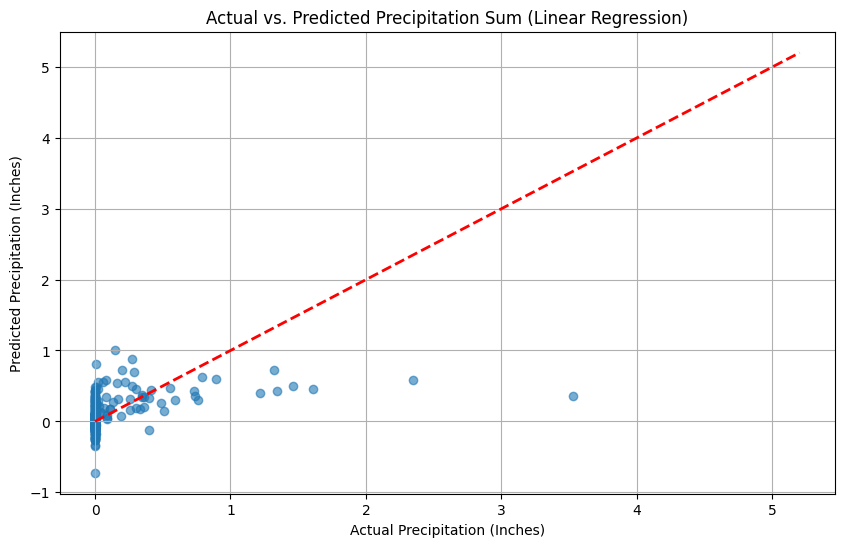

<ipython-input-7-2422135338>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


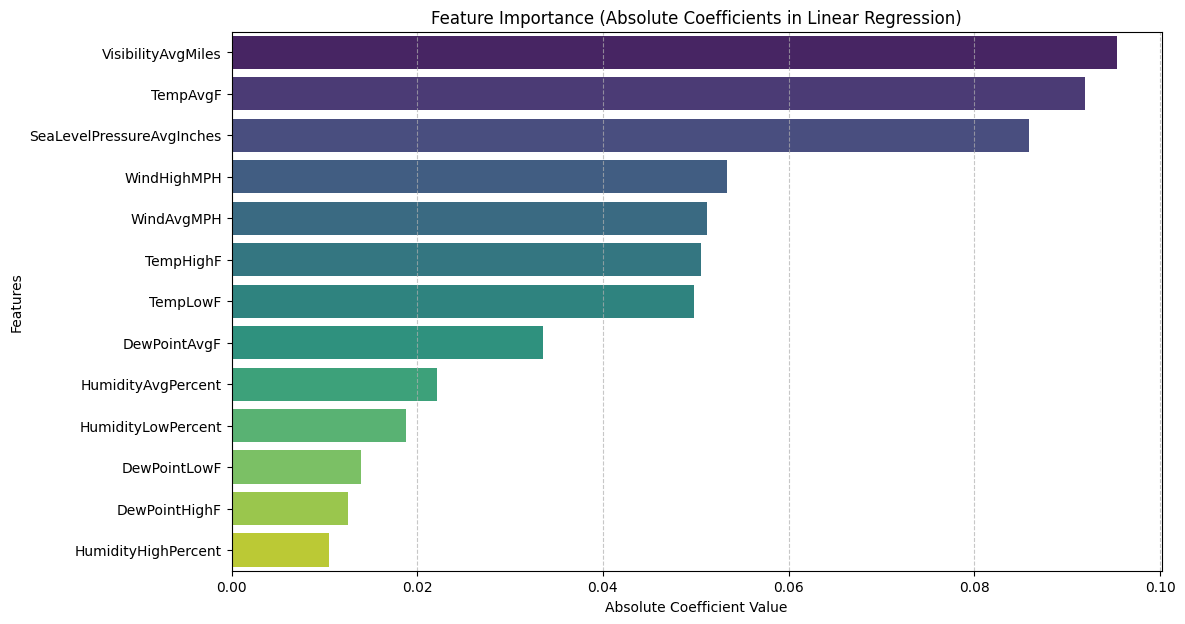

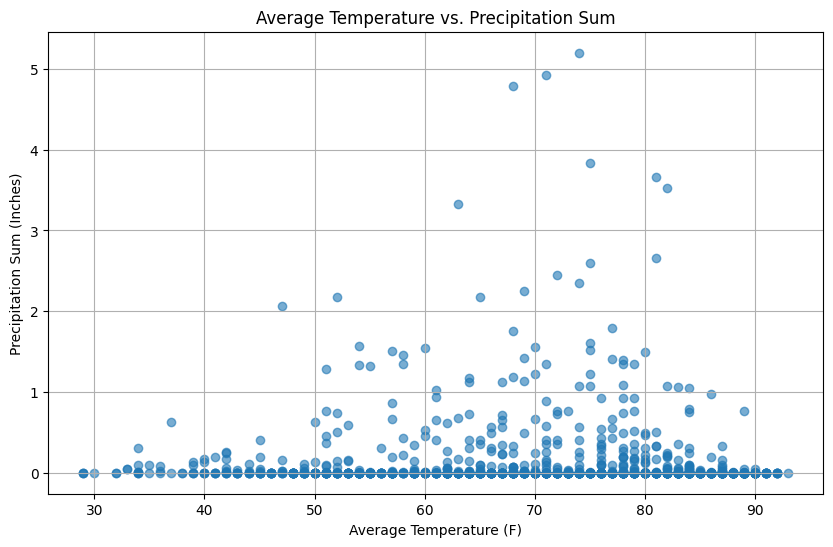

In [7]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Precipitation (Inches)")
plt.ylabel("Predicted Precipitation (Inches)")
plt.title("Actual vs. Predicted Precipitation Sum (Linear Regression)")
plt.grid(True)
plt.show()

# Plotting feature importance (absolute coefficients)
# This gives a basic idea of which features the model considers important
feature_importance = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Absolute Coefficients in Linear Regression)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Example: Plotting a single feature vs. PrecipitationSumInches (e.g., TempAvgF)
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['TempAvgF'], df_cleaned['PrecipitationSumInches'], alpha=0.6)
plt.xlabel("Average Temperature (F)")
plt.ylabel("Precipitation Sum (Inches)")
plt.title("Average Temperature vs. Precipitation Sum")
plt.grid(True)
plt.show()

8. Final Summary-
This project successfully loaded and preprocessed the Austin weather dataset, handling missing values and converting 'T' (trace) precipitation to a numerical format. A Linear Regression model was trained to predict PrecipitationSumInches based on various weather parameters. The model achieved an R-squared score of 0.6231, indicating that approximately 62.31% of the variance in precipitation can be explained by the input features. The Mean Absolute Error (MAE) was 0.0886 inches, and the Root Mean Squared Error (RMSE) was 0.2974 inches, suggesting that on average, the model's predictions deviate from actual precipitation by roughly 0.09 to 0.3 inches. Further actionable recommendations include exploring more advanced machine learning models (e.g., RandomForest, Gradient Boosting) for potentially higher accuracy, incorporating more feature engineering (e.g., temporal features from the 'Date' column, interactions between existing features), and conducting a more in-depth analysis of outliers and their impact on model performance.